In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [12]:
def fft(x):

    """
    Aluno: Lucas Rodrigues Albino.
    Implementação da FFT pelo algoritmo Decimação no Tempo

    """

    N = len(x)

    if (N == 1): # verificar o comprimento
        return x

    else:
        Wn = np.exp(-2j * np.pi * np.arange(N//2) / N)
        par = fft(x[0::2])
        impar = fft(x[1::2])

    #G(h) + Wn*H(h)
    #G(h) - Wn*H(h)

    return np.concatenate([par + Wn * impar, par - Wn * impar])

Text(0, 0.5, 'PHASE')

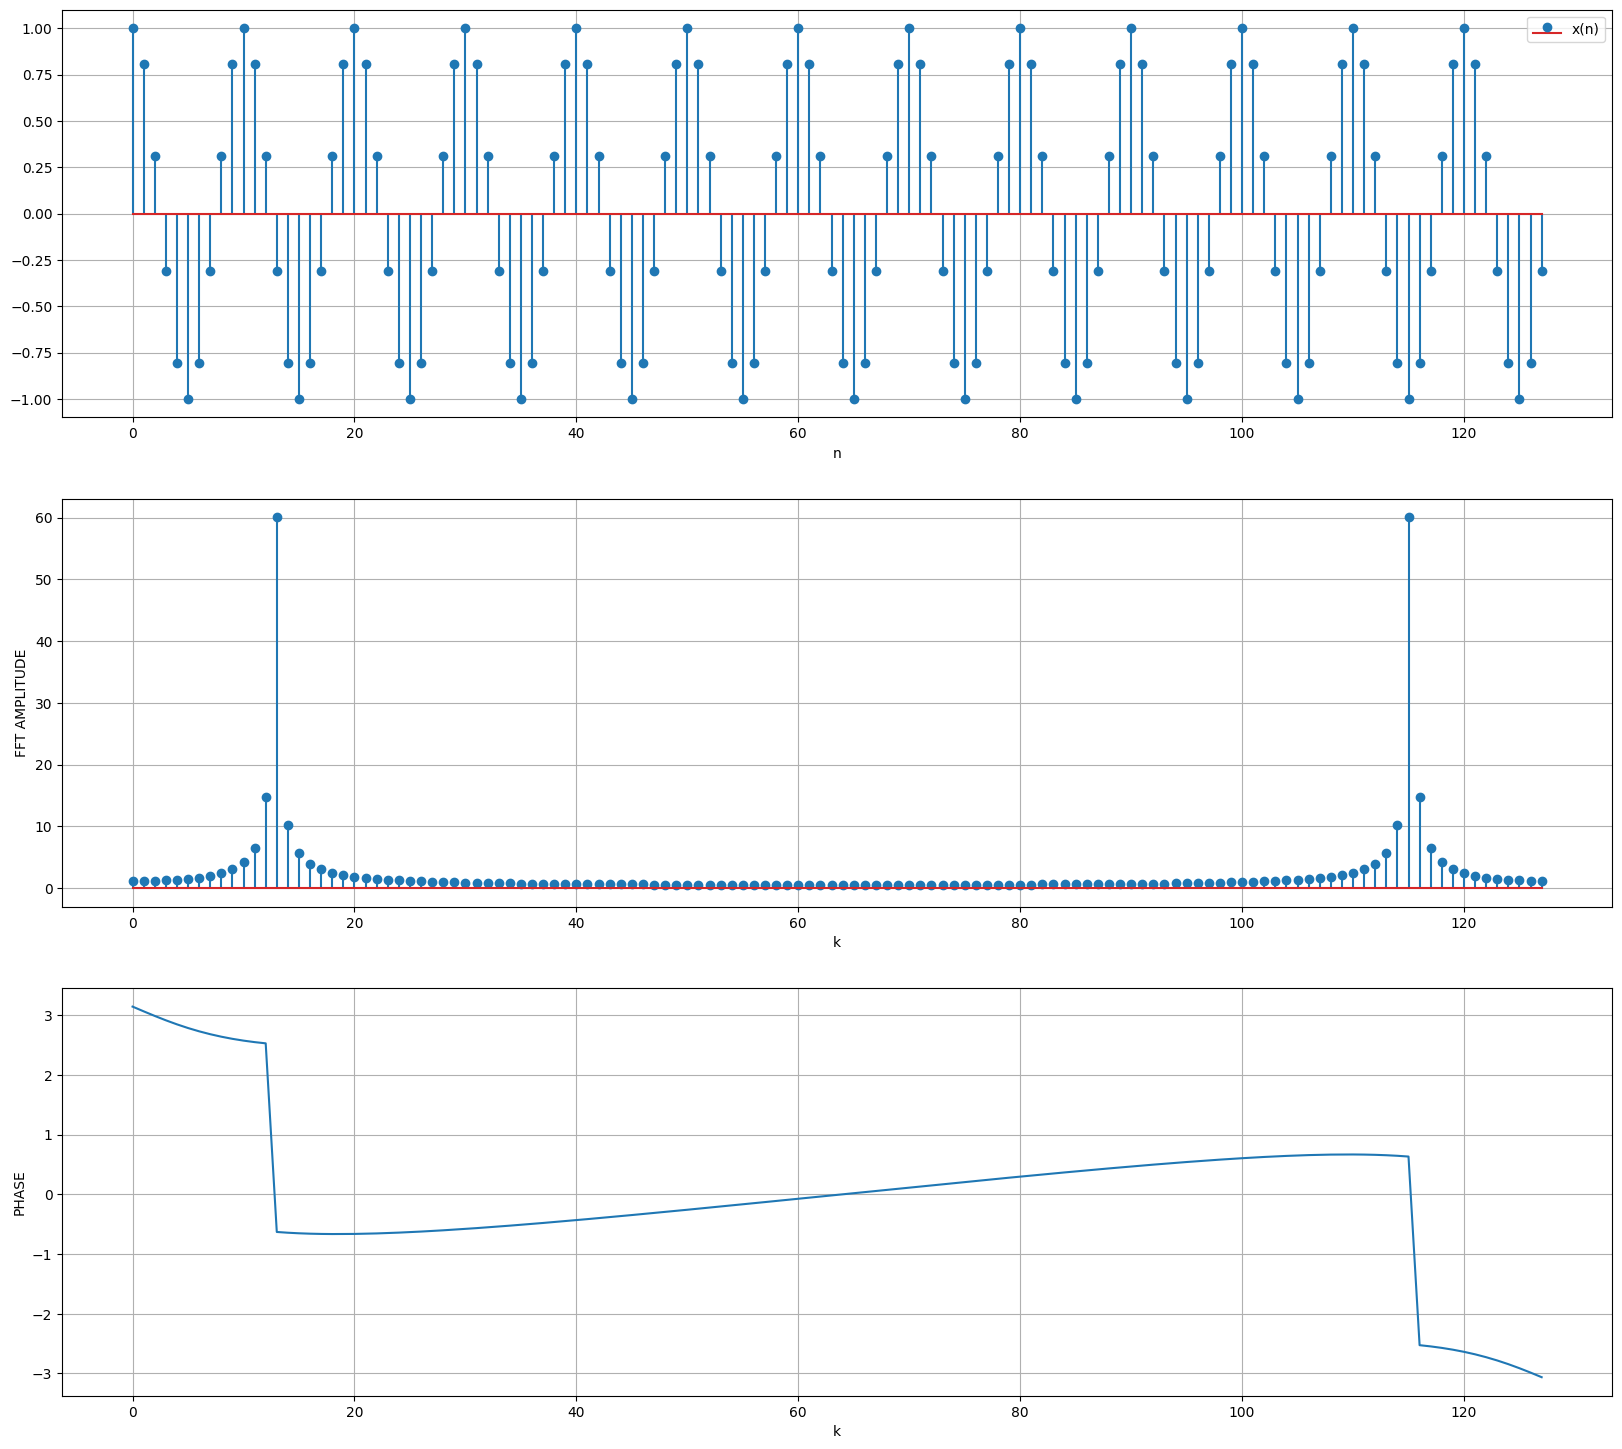

In [13]:
def func(n):
    return np.cos(2*np.pi*n/10)

NFFT = 128
k = np.arange(0, NFFT)
signal = fft(func(k))

figure, ax = plt.subplots(3,1,figsize=(20,18))
ax[0].stem(k, func(k), label = 'x(n)') ## sinal amostrado
ax[0].grid(True)
ax[0].set_xlabel('n')
ax[0].legend(loc = 'upper right')

ax[1].stem(k, abs(signal))
ax[1].grid(True)
ax[1].set_xlabel('k')
ax[1].set_ylabel('FFT AMPLITUDE')

ax[2].plot(k, np.angle(signal))
ax[2].grid(True)
ax[2].set_xlabel('k')
ax[2].set_ylabel('PHASE')

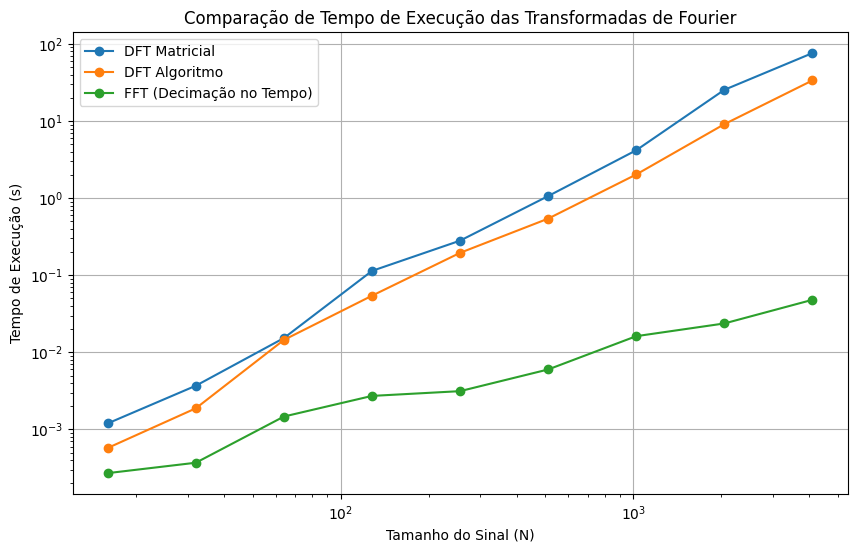

In [17]:
# Função para verificar se o número é potência de 2
def isPowerOf2(NFFT):
    return (NFFT > 0) and ((NFFT & (NFFT - 1)) == 0)

# Implementação da DFT Matricial com verificação de potência de 2
def DFT(signal, NFFT):
    """
    Implementação da transformada de Fourier discreta pelo método das matrizes.
    """

    if NFFT < signal.size:
        NFFT = signal.size

    if isPowerOf2(NFFT) == False:
        NFFT = signal.size

    # define a constante ω
    ω = np.exp((-2*np.pi*1j)/NFFT)

    # define a matriz W
    W = np.zeros((NFFT, NFFT), dtype="complex")

    for j in range(NFFT):
        for k in range(NFFT):
            W[j][k] = np.power(ω, j*k) * 1/np.sqrt(NFFT)

    dft = np.matmul(W, signal.T)

    return dft

# Implementação da DFT usando algoritmo próprio (usando loops)
def dft_algorithm(x):
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

# Implementação da FFT já fornecida
def fft(x):
    N = len(x)
    if N == 1:
        return x
    else:
        Wn = np.exp(-2j * np.pi * np.arange(N // 2) / N)
        even = fft(x[0::2])
        odd = fft(x[1::2])
        return np.concatenate([even + Wn * odd, even - Wn * odd])

# Função para medir o tempo de execução
def measure_time(func, x, NFFT=None):
    start = time.time()
    if NFFT:
        result = func(x, NFFT)
    else:
        result = func(x)
    end = time.time()
    return end - start

# Função para gerar um sinal de referência
def func(n):
    return np.cos(2*np.pi*n/10)

# Configuração do tamanho do sinal
signal_sizes = [2**i for i in range(4, 13)]  # Sinais de tamanho 16 a 4096
times_dft_matrix = []
times_dft_algorithm = []
times_fft = []

# Medindo o tempo de execução para cada tamanho de sinal
for size in signal_sizes:
    x = func(np.arange(0, size))
    times_dft_matrix.append(measure_time(DFT, x, size))
    times_dft_algorithm.append(measure_time(dft_algorithm, x))
    times_fft.append(measure_time(fft, x))

# Plotando os resultados
plt.figure(figsize=(10, 6))
plt.plot(signal_sizes, times_dft_matrix, label='DFT Matricial', marker='o')
plt.plot(signal_sizes, times_dft_algorithm, label='DFT Algoritmo', marker='o')
plt.plot(signal_sizes, times_fft, label='FFT (Decimação no Tempo)', marker='o')
plt.xlabel('Tamanho do Sinal (N)')
plt.ylabel('Tempo de Execução (s)')
plt.yscale('log')
plt.xscale('log')
plt.title('Comparação de Tempo de Execução das Transformadas de Fourier')
plt.legend()
plt.grid(True)
plt.show()